In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc

# PHASE 2

In [3]:
df4= pd.read_csv("C:\\Users\\ranab\\Downloads\\stroke-data_preprocessed.csv")   #Reading of preprocessed dataset.

In [4]:
X = df4.iloc[:,1:11]                                                      #Splitting the data into dependendent attributes.
X1=X.astype('int')                                                        #Conversion of data type into integer.
X1

,gender,age,hypertension,heart_disease,married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228,37,1
1,0,61,0,0,1,3,0,202,29,2
2,1,80,0,1,1,2,0,105,33,2
3,0,49,0,0,1,2,1,171,35,3
4,0,79,1,0,1,3,0,174,24,2
...,...,...,...,...,...,...,...,...,...,...
5491,1,63,1,0,0,1,0,191,20,1
5492,1,74,1,0,0,4,0,121,31,3
5493,1,68,1,0,0,2,0,199,22,2
5494,1,74,1,1,0,1,0,114,29,3


In [5]:
Y = df4.iloc[:,11]                                                          #Splitting the data into target attribute.
Y1= Y.astype('int')                                                         #Conversion of target attribute into integer.
Y1

0       1
1       1
2       1
3       1
4       1
       ..
5491    1
5492    1
5493    1
5494    1
5495    1
Name: stroke, Length: 5496, dtype: int32

# Split the data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.20,random_state = 235)   #splitting the dataset into 70:20 ratio.

# Deploying the model

# SVM

In [7]:
from sklearn.svm import SVC
svm = SVC(random_state=1)                                                     #Deploying svm method into the model
svm.fit(X_train,y_train)                                                        

SVC(random_state=1)

In [8]:
y_pred = svm.predict(X_test)    
y_pred                                                                         #predicting the values of y_test

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
y_pred_train = svm.predict(X_train)                                            #predicting the values of y_train

## Train Test Accuracy 

In [10]:
print("Test accuracy_score: " + str(accuracy_score(y_test, y_pred)))
print("Train accuracy_score: " + str(accuracy_score(y_train, y_pred_train)))

Test accuracy_score: 0.9172727272727272
Train accuracy_score: 0.9112829845313922


In [11]:
train_scores = svm.score(X_train,y_train)
test_scores = svm.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


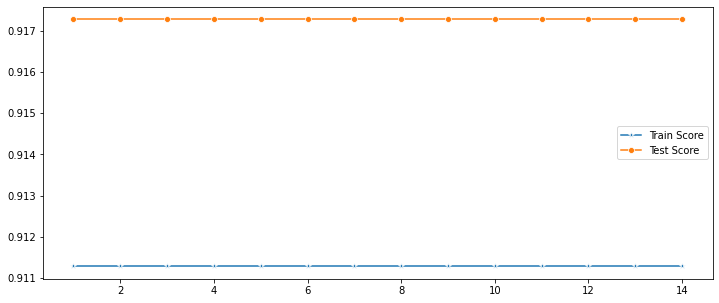

In [12]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

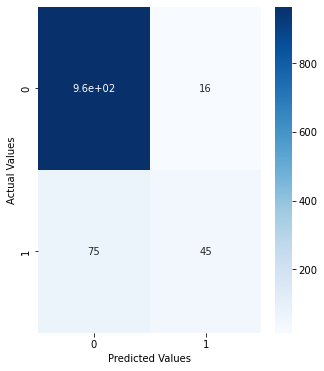

In [13]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                                     #plotting the confusion matrix

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc

In [15]:
accuracy_score(y_test,y_pred)                                    #Displaying the accuracy score of the model

0.9172727272727272

In [16]:
precision_score(y_test,y_pred)                                    #Displaying the precision score of the model.

0.7377049180327869

In [17]:
recall_score(y_test,y_pred)                                       #Displaying the recall score of the model.

0.375

In [18]:
f1_score(y_test,y_pred)                                            #Displaying the f1 score of the model.

0.49723756906077343

<Figure size 144x216 with 0 Axes>

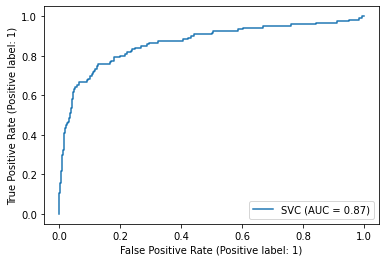

In [19]:
plt.figure(figsize=(2,3))
plot_roc_curve(svm,X_test, y_test)
plt.show()                                                         #plotting the roc curve using svm model.

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
clc = regressor.fit(X_train, y_train)
regressor

C:\Users\ranab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y1_pred = clc.predict(X_test)   #predicting the values of y_test

In [22]:
y_train_pred1= clc.predict(X_train)

## Train Test accuracy

In [23]:
print("Test accuracy_score: " + str(accuracy_score(y_test, y1_pred)))
print("Train accuracy_score: " + str(accuracy_score(y_train, y_train_pred1)))

Test accuracy_score: 0.9418181818181818
Train accuracy_score: 0.9406278434940856


In [24]:
train_scores = clc.score(X_train,y_train)
test_scores = clc.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


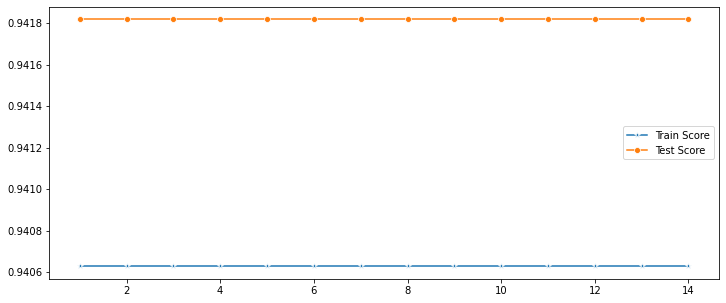

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_pred)                                          #Displaying the accuracy score of the model

0.9418181818181818

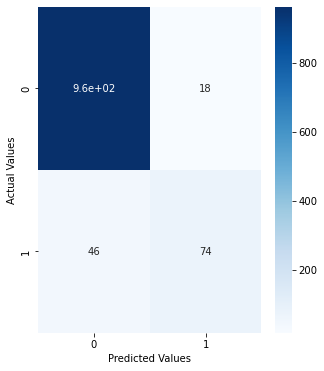

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y1_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                              #Displaying the confusion matrix

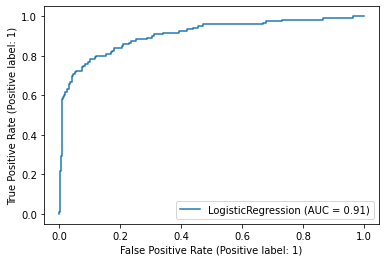

In [28]:
plot_roc_curve(clc,X_test, y_test)
plt.show()                                                              #Plotting the ROC curve using Logistic regression model.

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test,y1_pred)                                            #Displaying the recall score of the model.

0.6166666666666667

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test,y1_pred)                                         #Displaying the precision score of the model.

0.8043478260869565

In [31]:
f1_score(y_test,y1_pred)                                               #Displaying the precision score of the model

0.6981132075471699

# DECISION TREE 

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree             #Importing the model Decision Tree

## Train Test accuracy

In [33]:
model = DecisionTreeClassifier(max_depth= 20)
model.fit(X_train, y_train)
predsdtc = model.predict(X_test)
predsdtc1 = model.predict(X_train)
print("Test accuracy_score: " + str(accuracy_score(y_test, predsdtc)))
print("Train accuracy_score: " + str(accuracy_score(y_train, predsdtc1)))

Test accuracy_score: 0.9109090909090909
Train accuracy_score: 1.0


In [34]:
train_scores = model.score(X_train,y_train)
test_scores = model.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


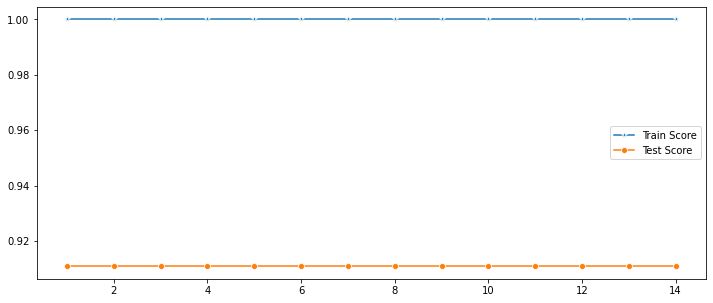

In [35]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [36]:
print("f1_score: " + str(f1_score(y_test, predsdtc)))                  #Displaying F1 score of the model.

f1_score: 0.6141732283464567


In [37]:
precision_score(y_test,predsdtc)                                       #Displaying Precision score of the model.

0.582089552238806

In [38]:
recall_score(y_test,predsdtc)                                          #Displaying Recall score of the model.

0.65

In [39]:
print("ROC AUC score: " + str(roc_auc_score(y_test, predsdtc)))       #Displaying ROC AUC score of the model.

ROC AUC score: 0.7964285714285714


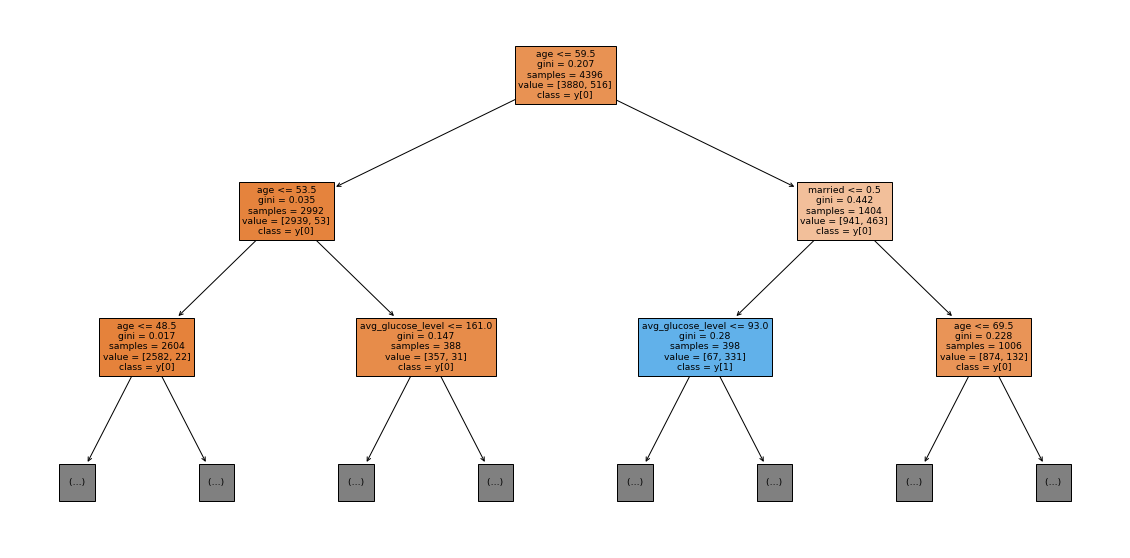

In [40]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X_train.columns,max_depth = 2,filled=True,class_names = True)
plt.show()                                                           #Plot of trees in the given dataset.

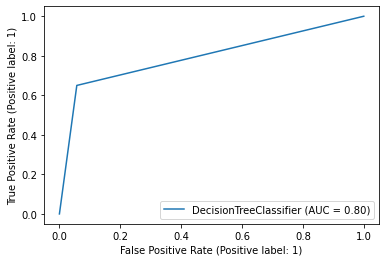

In [41]:
plot_roc_curve(model,X_test, y_test)
plt.show()                                                   #plotting ROC Curve of the model.

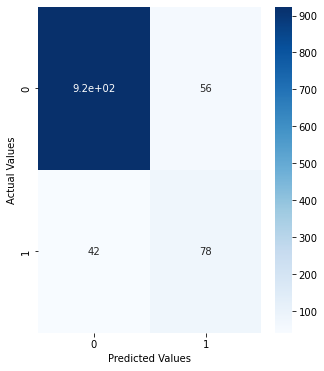

In [42]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test,predsdtc)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                            #Confusion matrix of the model prediction.

# RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier                  #Importing Random Forest Classifier.

In [44]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [45]:
train_scores = rf.score(X_train,y_train)
test_scores = rf.score(X_test,y_test)

C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


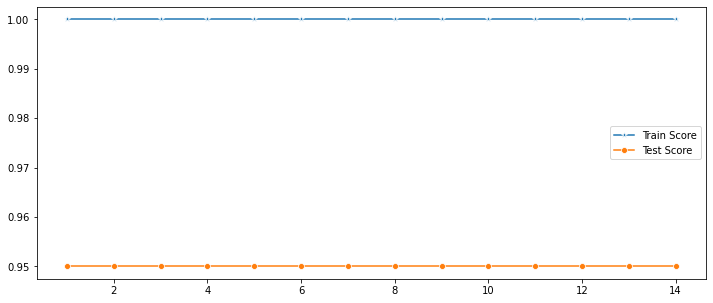

In [46]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

## Train Test Accuracy

In [47]:
y_pred_train_rf = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)
print("Test accuracy_score: " + str(accuracy_score(y_test,y_pred_test_rf)))
print("Train accuracy_score: " + str(accuracy_score(y_train,y_pred_train_rf)))

Test accuracy_score: 0.95
Train accuracy_score: 1.0


In [48]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score:', roc_score)                         #Displaying the ROC AUC score of the model.

ROC AUC Score: 0.9153826530612245


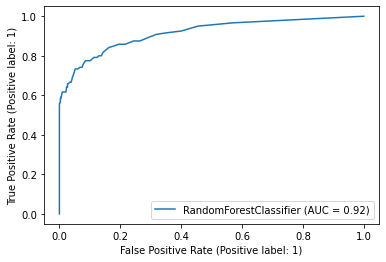

In [49]:
plot_roc_curve(rf,X_test, y_test)
plt.show()                                                 #Displaying the roc curve of the model.

In [50]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_test_rf)                         #Displaying precision score of the model

0.922077922077922

In [51]:
accuracy_score(y_test,y_pred_test_rf)

0.95

In [52]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_test_rf)                            #Displaying Recall score of the model

0.5916666666666667

In [53]:
f1_score(y_test,y_pred_test_rf)                               #Displaying F1 score of the model

0.7208121827411168

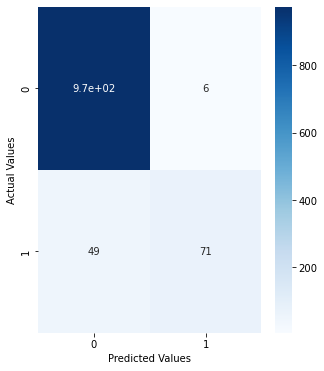

In [54]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_pred_test_rf)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                   #Displaying confusion matrix of the model prediction.

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier                        #importing KNN classifier.


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

## Train Test Accuracy

In [56]:
train_accuracy = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == train_accuracy]
print('Train Accuracy {} % and k = {}'.format(train_accuracy*100,list(map(lambda x: x+1, train_scores_ind))))
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Test Accuracy {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Train Accuracy 100.0 % and k = [1]
Test Accuracy 91.72727272727272 % and k = [13, 14]


C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ranab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


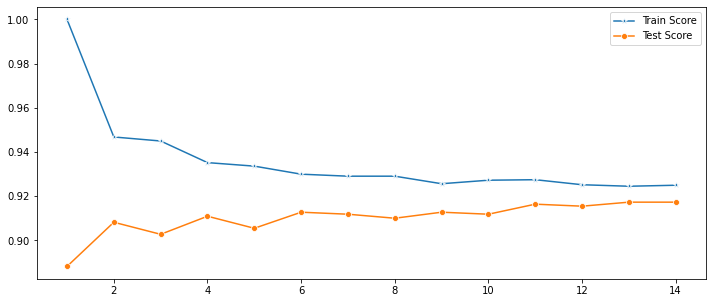

In [57]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')               #plotting train test score values into line plot.

In [58]:
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)                              #accuracy score of the model.

0.91

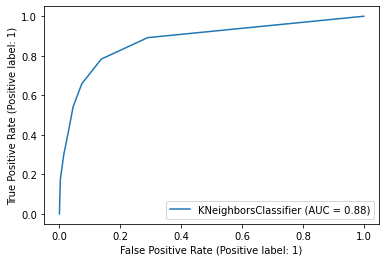

In [59]:
plot_roc_curve(knn,X_test, y_test)
plt.show()                                            #Plotting the ROC curve of the model.

In [60]:
Y_pred = knn.predict(X_test)
Y_pred_train= knn.predict(X_train)

In [61]:
from sklearn.metrics import precision_score
precision_score(y_train,Y_pred_train)                                         #Displaying the precision score of the model.

0.7931034482758621

In [62]:
recall_score(y_test,Y_pred)                                                  #Displaying the recall score of the model.

0.4166666666666667

In [63]:
f1_score(y_test,Y_pred)                                                     #Displaying the F1 Score of the model.

0.5025125628140704

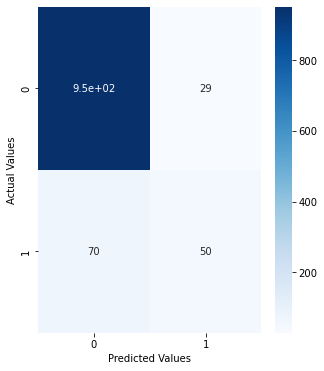

In [64]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, Y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()                                                                #Displaying the confusion matrix of the knn model

# METRICS COMPARISION AMONG MODELS 

In [65]:
print("Precision score of KNN is:", precision_score(y_test,Y_pred))
print("Precision score of Random Forest Classifier is:", precision_score(y_test,y_pred_test_rf))
print("Precision score of Decision Tree Classifier is:", precision_score(y_test,predsdtc))
print("Precision score of Support Vector Machine is:", precision_score(y_test,y_pred))
print("Precision score of Logistic Regression is:", precision_score(y_test,y1_pred))

Precision score of KNN is: 0.6329113924050633
Precision score of Random Forest Classifier is: 0.922077922077922
Precision score of Decision Tree Classifier is: 0.582089552238806
Precision score of Support Vector Machine is: 0.7377049180327869
Precision score of Logistic Regression is: 0.8043478260869565


In [66]:
print("Recall score of KNN is:", recall_score(y_test,Y_pred))
print("Recall score of Random Forest Classifier is:", recall_score(y_test,y_pred_test_rf))
print("Recall score of Decision Tree Classifier is:", recall_score(y_test,predsdtc))
print("Recall score of Support Vector Machine is:", recall_score(y_test,y_pred))
print("Recall score of Logistic Regression is:", recall_score(y_test,y1_pred))

Recall score of KNN is: 0.4166666666666667
Recall score of Random Forest Classifier is: 0.5916666666666667
Recall score of Decision Tree Classifier is: 0.65
Recall score of Support Vector Machine is: 0.375
Recall score of Logistic Regression is: 0.6166666666666667


In [67]:
print("F1 score of KNN is:", f1_score(y_test,Y_pred))
print("F1 score of Random Forest Classifier is:", f1_score(y_test,y_pred_test_rf))
print("F1 score of Decision Tree Classifier is:", f1_score(y_test,predsdtc))
print("F1 score of Support Vector Machine is:", f1_score(y_test,y_pred))
print("F1 score of Logistic Regression is:", f1_score(y_test,y1_pred))

F1 score of KNN is: 0.5025125628140704
F1 score of Random Forest Classifier is: 0.7208121827411168
F1 score of Decision Tree Classifier is: 0.6141732283464567
F1 score of Support Vector Machine is: 0.49723756906077343
F1 score of Logistic Regression is: 0.6981132075471699


In [68]:
print("Accuracy score of KNN is:", accuracy_score(y_test,Y_pred))
print("Accuracy score of Random Forest Classifier is:", accuracy_score(y_test,y_pred_test_rf))
print("Accuracy score of Decision Tree Classifier is:", accuracy_score(y_test,predsdtc))
print("Accuracy score of Support Vector Machine is:", accuracy_score(y_test,y_pred))
print("Accuracy score of Logistic Regression is:", accuracy_score(y_test,y1_pred))

Accuracy score of KNN is: 0.91
Accuracy score of Random Forest Classifier is: 0.95
Accuracy score of Decision Tree Classifier is: 0.9109090909090909
Accuracy score of Support Vector Machine is: 0.9172727272727272
Accuracy score of Logistic Regression is: 0.9418181818181818
